<h1 style="text-align:center; font-size: 2.5em; font-weight: bold; background: linear-gradient(90deg, #ff7eb3, #ff758c); -webkit-background-clip: text; color: transparent;">📌 Table of Contents</h1>
<ul style="font-size: 1.2em; list-style-type: none;">
    <li>🔹 <a href="#intro">Introduction</a></li>
    <li>🔹 <a href="#problem">Problem Statement</a></li>
    <li>🔹 <a href="#data_collection">Data Collection</a></li>
    <li>🔹 <a href="#eda">Exploratory Data Analysis (EDA)</a></li>
    <li>🔹 <a href="#preprocessing">Data Preprocessing</a></li>
    <li>🔹 <a href="#feature">Feature Engineering</a></li>
    <li>🔹 <a href="#model">Model Building</a></li>
    <li>🔹 <a href="#evaluation">Model Evaluation</a></li>
    <li>🔹 <a href="#deployment">Deployment</a></li>
</ul>
<!-- CSS for Animations & Styling -->
<style>
@keyframes fadeIn {
  from { opacity: 0; }
  to { opacity: 1; }
}

h1, h2 {
  animation: fadeIn 1.5s ease-in-out;
}

ul li a {
  transition: color 0.3s;
}

ul li a:hover {
  color: #e74c3c;
}
</style>


<!-- Introduction -->

1.   List item
2.   List item


<h1 id="intro" style="background: linear-gradient(90deg, #7f7fd5, #86a8e7, #91eae4); -webkit-background-clip: text; color: transparent; text-align: center; font-size: 2em;">🚀 Project Title: Predicting Sleep Disorders</h1>
<p style="font-size: 1.2em; color: #555; text-align: center;">This project aims to predict the presence and type of sleep disorders (None, Insomnia, Sleep Apnea) in individuals By utilizing this model, the healthcare provider aims to improve early intervention strategies, optimize patient care, and enhance overall sleep health..</p>



<!-- Problem Statement -->
<h2 id="problem" style="color: #ff6f61; text-decoration: underline;">🎯 Problem Statement</h2>
<p style="font-size: 1.1em;">Early Detection: The model will help identify individuals at risk of sleep disorders, allowing for timely intervention and treatment.
Personalized Care: By predicting sleep disorder risk accurately, healthcare providers can tailor treatment plans to individual patient needs.
Lifestyle Insights: Understanding the impact of lifestyle factors on sleep disorders can lead to better prevention strategies and patient education.</p>


In [373]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
palette = 'rocket'
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

<!-- Data Collection -->
<h2 id="data_collection" style="color: #4CAF50; text-decoration: underline;">📊 Data Collection</h2>
<p style="font-size: 1.1em;">Dataset Loading and Studying Data.</p>


In [374]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [375]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [376]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [377]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [379]:
df.shape

(374, 13)

In [380]:
df["Sleep Disorder"].isnull().sum()

219

In [381]:
# df = df.dropna(subset=['Sleep Disorder'])
# df.reset_index(drop=True, inplace=True)

In [382]:
df["Sleep Disorder"].fillna("None", inplace=True)

In [383]:
df["Sleep Disorder"].isnull().sum()

0

In [384]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [386]:
df.duplicated().sum()

0

<!-- Data Preprocessing -->
<h2 id="preprocessing" style="color: #FF9800; text-decoration: underline;">⚙️ Data Preprocessing</h2>
<p style="font-size: 1.1em;">Handling missing values, encoding categorical features, and normalizing data.</p>


In [387]:
df.drop('Person ID', axis=1, inplace=True)

In [388]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [389]:
df[['SYS', 'DIA']] = df['Blood Pressure'].str.split("/", expand = True)
df.drop('Blood Pressure', axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYS,DIA
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [390]:
df[['SYS', 'DIA']] = df[['SYS', 'DIA']].apply(pd.to_numeric)

In [391]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,SYS,DIA
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


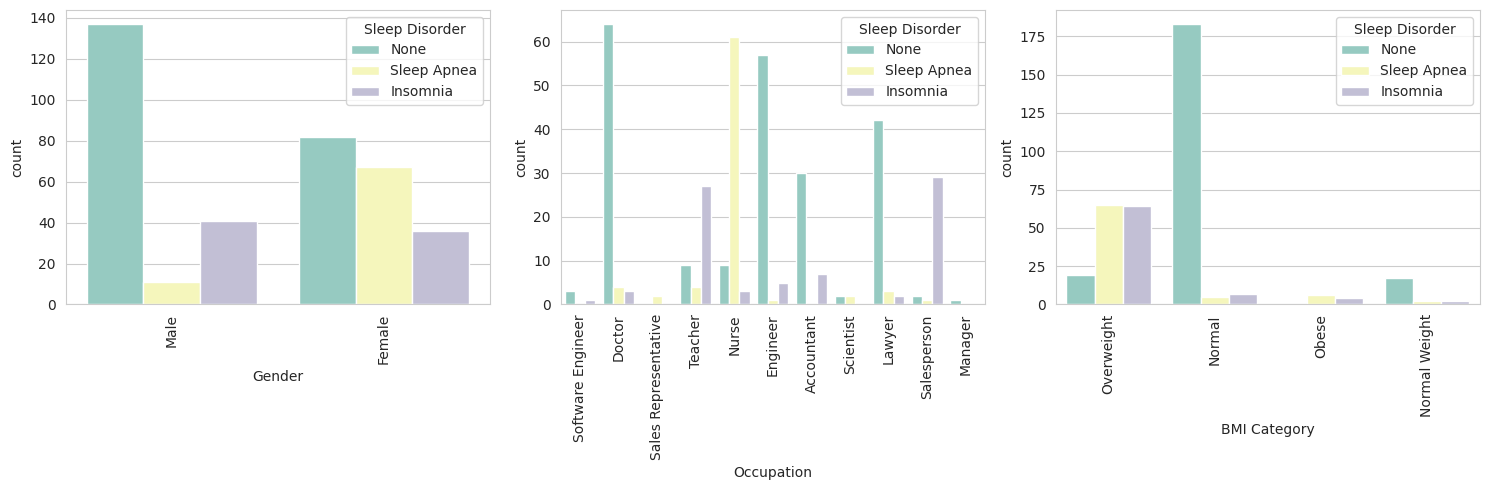

In [392]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create figure with subplots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
axs = axs.flatten()

# Create barplots for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x = var, hue = 'Sleep Disorder', data = df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

<!-- EDA -->
<h2 id="eda" style="color: #1E90FF; text-decoration: underline;">📈 Exploratory Data Analysis (EDA)</h2>
<p style="font-size: 1.1em;">Visualizing and summarizing the dataset using statistics and graphs.</p>


<Axes: xlabel='Sleep Disorder', ylabel='count'>

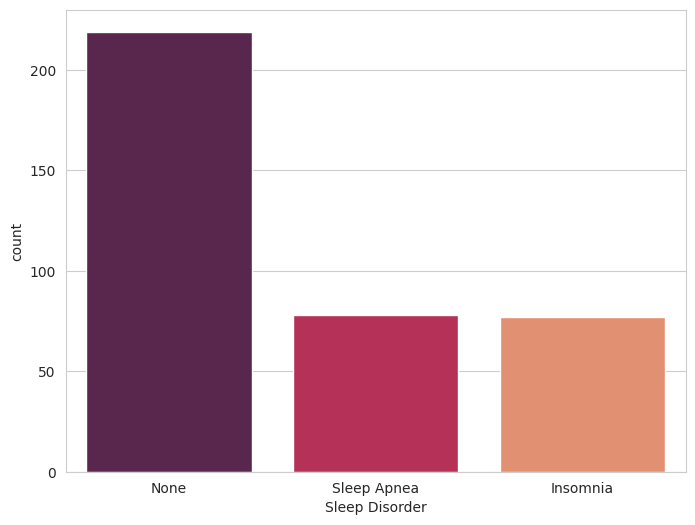

In [393]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sleep Disorder', data=df, palette=palette)

<Axes: xlabel='Sleep Disorder', ylabel='count'>

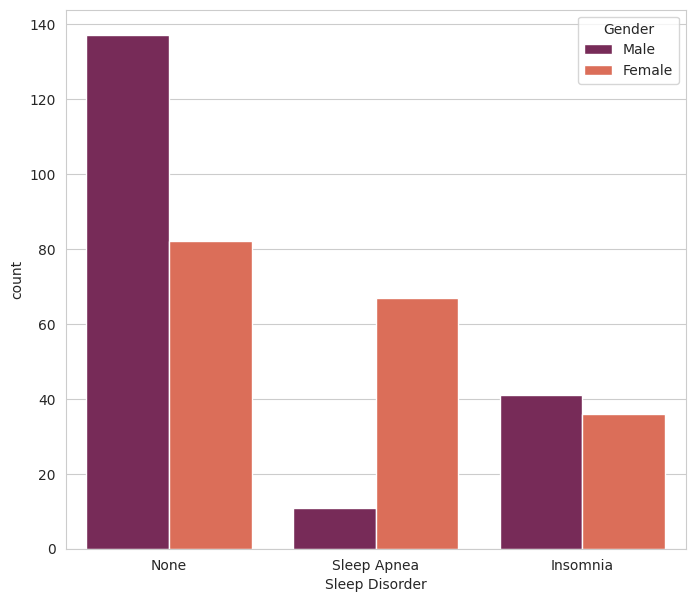

In [394]:
plt.figure(figsize=(8,7))
sns.countplot(x='Sleep Disorder', hue='Gender', data=df, palette=palette)

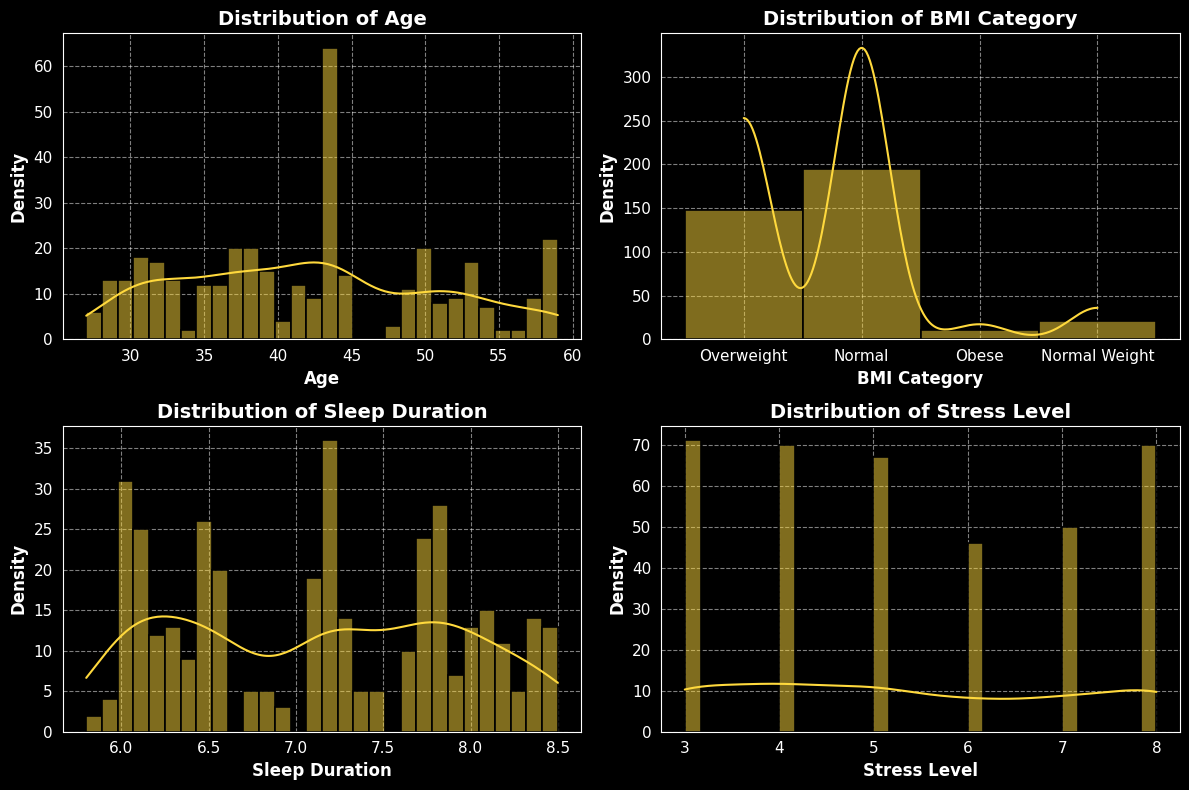

In [395]:
# Features to visualize
features = ["Age", "BMI Category", "Sleep Duration", "Stress Level"]  # Add more if needed

# Set dark theme
plt.style.use("dark_background")

# Plot each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color="#FFD93D", edgecolor="black", linewidth=1.2)
    plt.title(f"Distribution of {feature}", fontsize=14, fontweight="bold", color="white")
    plt.xlabel(feature, fontsize=12, fontweight="bold", color="white")
    plt.ylabel("Density", fontsize=12, fontweight="bold", color="white")
    plt.xticks(fontsize=11, color="white")
    plt.yticks(fontsize=11, color="white")
    plt.grid(True, linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


In [396]:
df['Sleep Disorder'] = pd.Categorical(df['Sleep Disorder'])

In [397]:
df["BMI Category"] = df["BMI Category"].astype("category").cat.codes

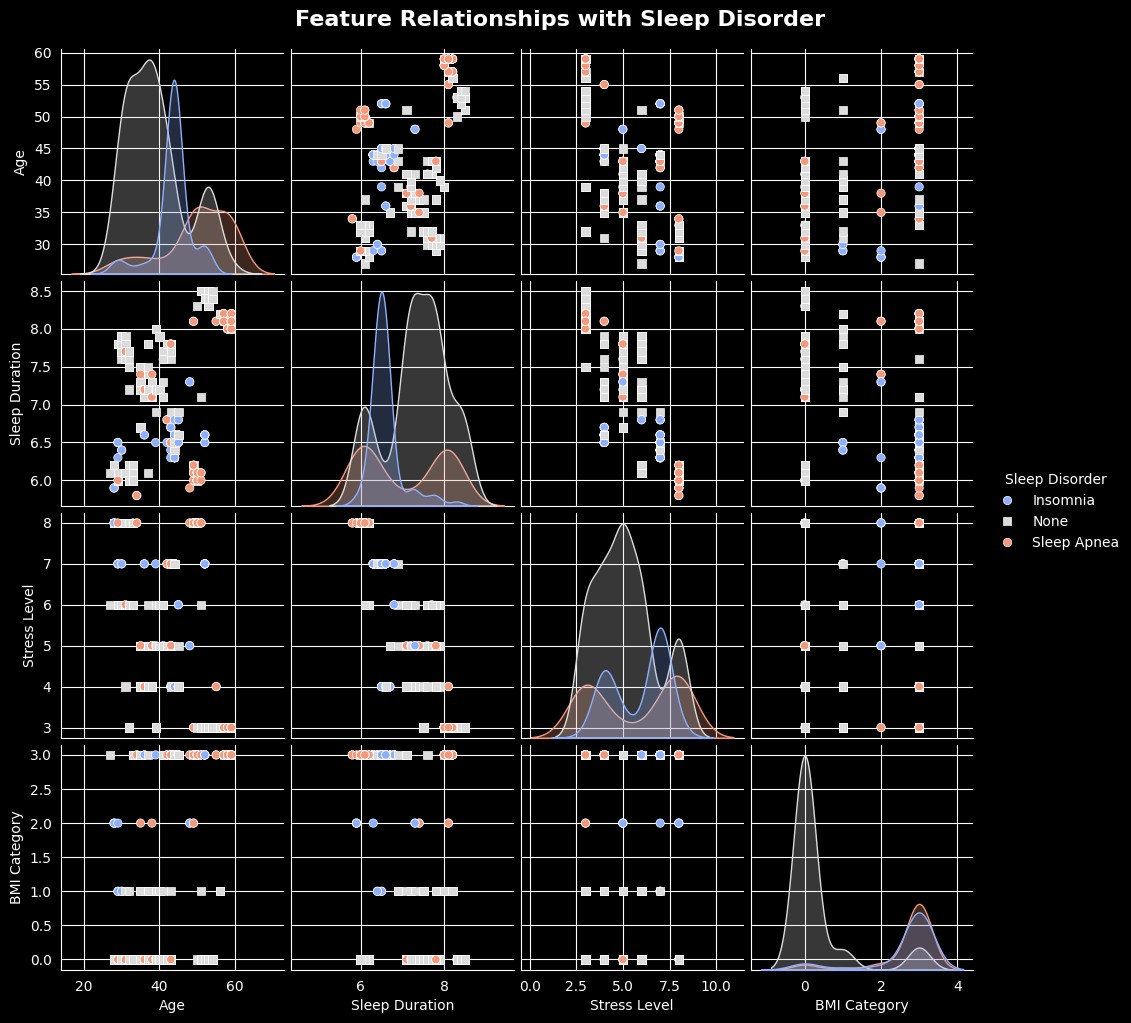

In [398]:
# Update feature list based on actual column names
features = ["Age", "Sleep Duration", "Stress Level", "BMI Category"]  # Adjust BMI column

# Pairplot with hue for Sleep Disorder
plt.style.use("dark_background")
sns.pairplot(df, vars=features, hue="Sleep Disorder", palette="coolwarm", diag_kind="kde", markers=["o", "s"])
plt.suptitle("Feature Relationships with Sleep Disorder", fontsize=16, fontweight="bold", color="white", y=1.02)

# Show the plot
plt.show()


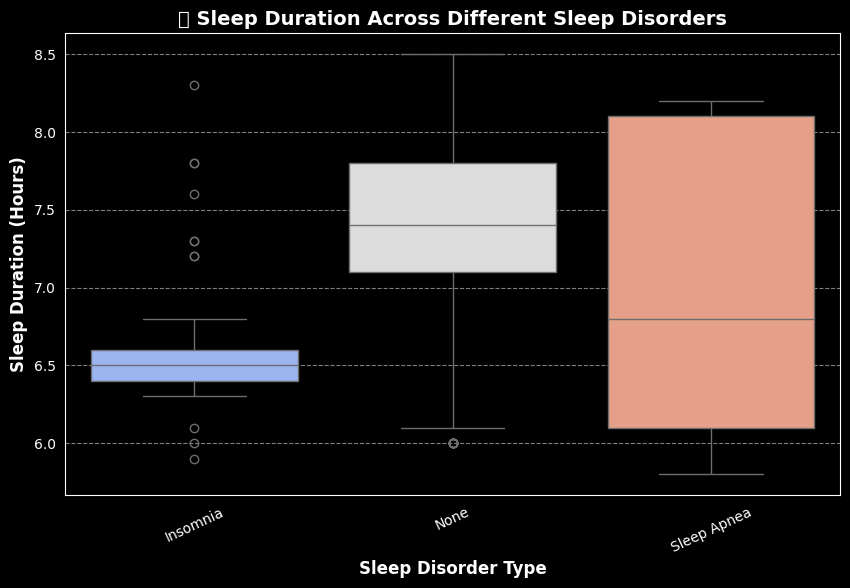

In [399]:

# Set modern dark theme
plt.style.use("dark_background")

# Create a figure
plt.figure(figsize=(10, 6))

# Box Plot
sns.boxplot(x="Sleep Disorder", y="Sleep Duration", data=df, palette="coolwarm")

# Customizing design
plt.title("📊 Sleep Duration Across Different Sleep Disorders", fontsize=14, fontweight="bold", color="white")
plt.xlabel("Sleep Disorder Type", fontsize=12, fontweight="bold", color="white")
plt.ylabel("Sleep Duration (Hours)", fontsize=12, fontweight="bold", color="white")
plt.xticks(rotation=25, fontsize=10, color="white")
plt.yticks(fontsize=10, color="white")

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display plot
plt.show()


In [400]:
df["Sleep Duration"] = np.where(df["Sleep Duration"] < lower_bound, lower_bound, df["Sleep Duration"])
df["Sleep Duration"] = np.where(df["Sleep Duration"] > upper_bound, upper_bound, df["Sleep Duration"])

In [401]:
df["Sleep Duration Log"] = np.log1p(df["Sleep Duration"])

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    object  
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    object  
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    int8    
 8   Heart Rate               374 non-null    int64   
 9   Daily Steps              374 non-null    int64   
 10  Sleep Disorder           374 non-null    category
 11  SYS                      374 non-null    int64   
 12  DIA                      374 non-null    int64   
 13  Sleep Duration Log       374 non-null    float64 
dtypes: categor

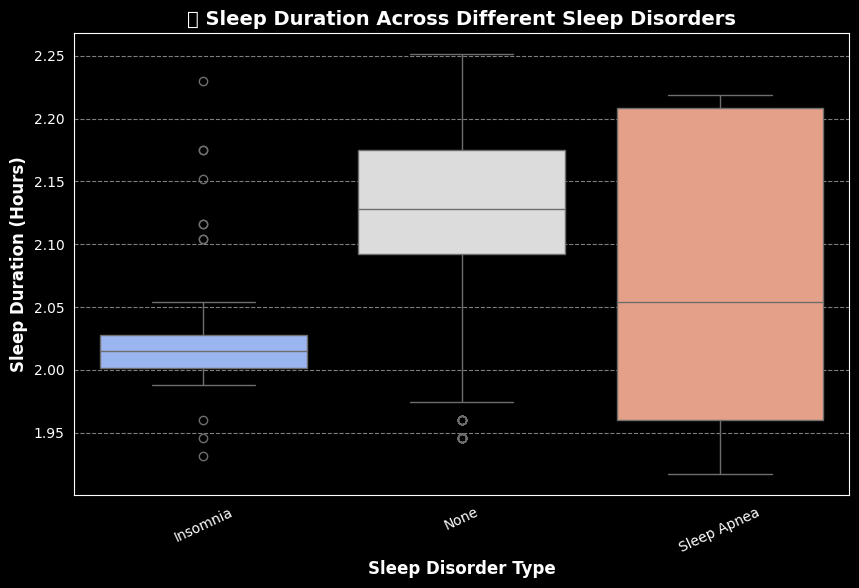

In [403]:

# Set modern dark theme
plt.style.use("dark_background")

# Create a figure
plt.figure(figsize=(10, 6))

# Box Plot
sns.boxplot(x="Sleep Disorder", y="Sleep Duration Log", data=df, palette="coolwarm")

# Customizing design
plt.title("📊 Sleep Duration Across Different Sleep Disorders", fontsize=14, fontweight="bold", color="white")
plt.xlabel("Sleep Disorder Type", fontsize=12, fontweight="bold", color="white")
plt.ylabel("Sleep Duration (Hours)", fontsize=12, fontweight="bold", color="white")
plt.xticks(rotation=25, fontsize=10, color="white")
plt.yticks(fontsize=10, color="white")

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Display plot
plt.show()


<Axes: xlabel='BMI Category', ylabel='count'>

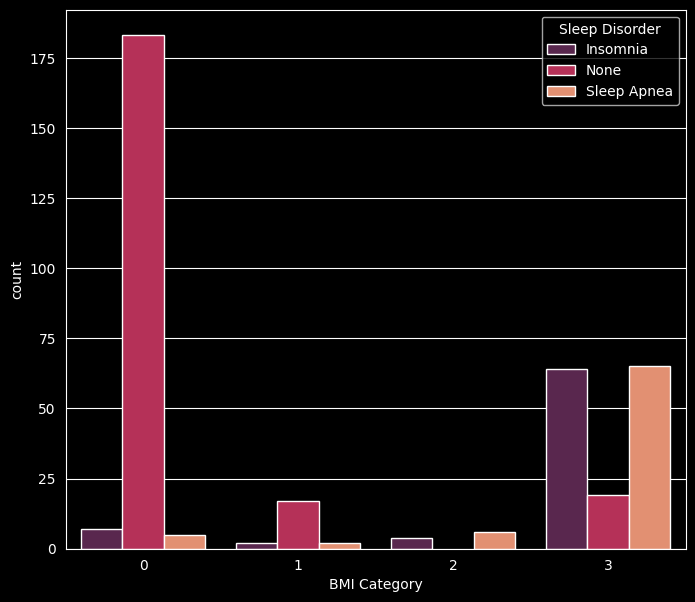

In [404]:
plt.figure(figsize=(8,7))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df, palette=palette)

In [405]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))


Categorical Columns: ['Gender', 'Occupation', 'Sleep Disorder']
Numerical Columns: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'SYS', 'DIA', 'Sleep Duration Log']


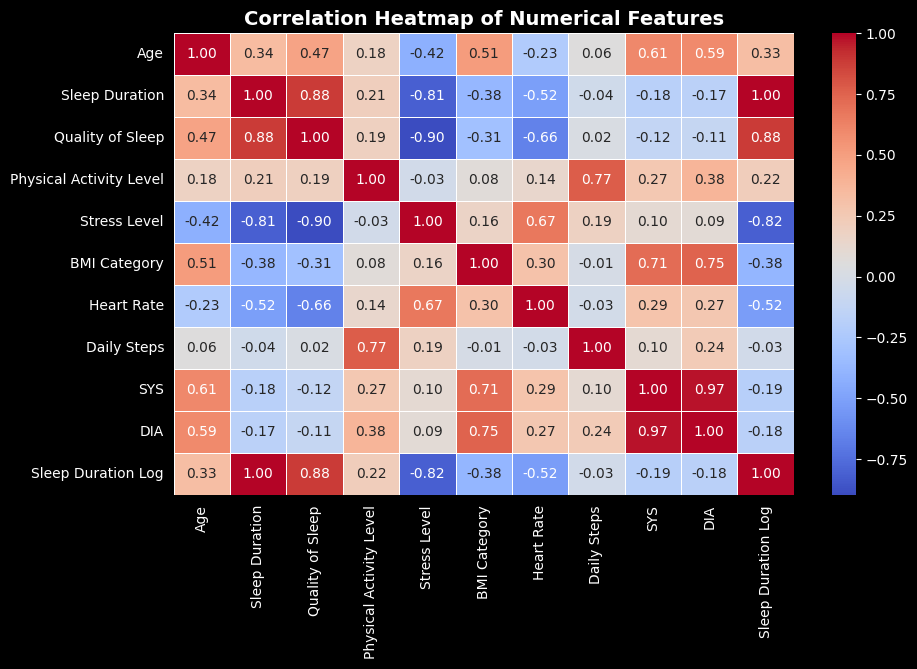

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title and display
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")
plt.show()


In [407]:
scaled_features = df.copy()
col_names = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Daily Steps', 'SYS', 'DIA']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
final_data = pd.DataFrame(scaled_features)
final_data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYS,DIA,Sleep Duration Log
0,Male,27,Software Engineer,-1.298887,-1.098280,-0.825418,0.347021,3,77,-1.619584,None,-0.330002,-0.268102,1.960095
1,Male,28,Doctor,-1.173036,-1.098280,0.039844,1.475592,0,75,1.970077,None,-0.459239,-0.755640,1.974081
2,Male,28,Doctor,-1.173036,-1.098280,0.039844,1.475592,0,75,1.970077,None,-0.459239,-0.755640,1.974081
3,Male,28,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,2,85,-2.362273,Sleep Apnea,1.479309,0.869486,1.931521
4,Male,28,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,2,85,-2.362273,Sleep Apnea,1.479309,0.869486,1.931521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,1.218127,1.411435,0.760896,-1.345836,3,68,0.113356,Sleep Apnea,1.479309,1.682049,2.208274
370,Female,59,Nurse,1.092276,1.411435,0.760896,-1.345836,3,68,0.113356,Sleep Apnea,1.479309,1.682049,2.197225
371,Female,59,Nurse,1.218127,1.411435,0.760896,-1.345836,3,68,0.113356,Sleep Apnea,1.479309,1.682049,2.208274
372,Female,59,Nurse,1.218127,1.411435,0.760896,-1.345836,3,68,0.113356,Sleep Apnea,1.479309,1.682049,2.208274


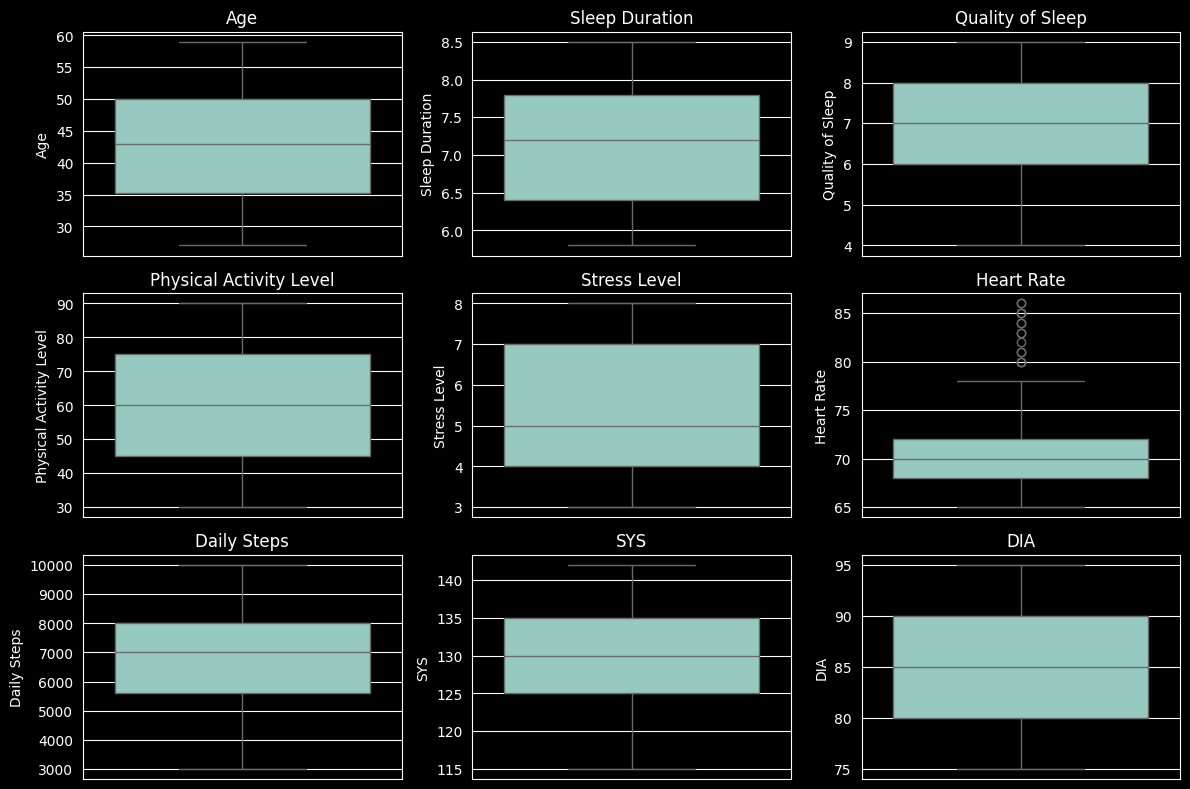

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns to detect outliers
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps', 'SYS', 'DIA']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [409]:
import pandas as pd

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
                  'Physical Activity Level', 'Stress Level', 'Heart Rate',
                  'Daily Steps', 'SYS', 'DIA']

# Apply IQR method to each column
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Check the new shape of the dataset
print(df.shape)


(359, 14)


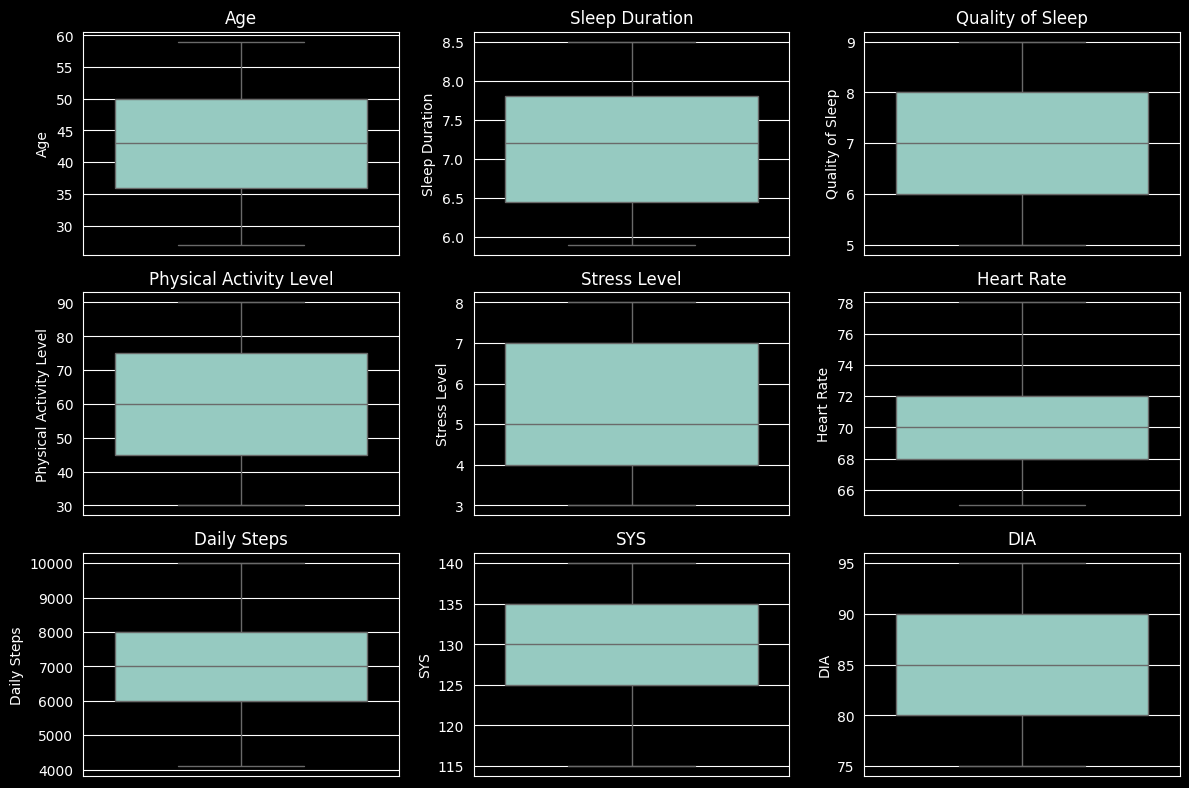

In [410]:
plt.figure(figsize=(12, 8))
remove_outliers_iqr = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps', 'SYS', 'DIA']

for i, col in enumerate(remove_outliers_iqr, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [411]:
# label_encoder = preprocessing.LabelEncoder()

In [412]:
# cat_feats = ['Gender', 'Occupation','BMI Category', 'Sleep Disorder']

In [413]:
# for feat in cat_feats:
#     df[feat] = label_encoder.fit_transform(df[feat])  # Use df instead of final_data

# df.head()

In [414]:
# df = pd.get_dummies(df, columns=[col for col in categorical_cols if df[col].nunique() > 2], drop_first=True)

# __Data Splitting:__

In [415]:
X = final_data.drop('Sleep Disorder',axis=1)
y = final_data['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [416]:
# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [417]:
print(df['Sleep Duration Log'].unique())
print(df['Sleep Duration'].unique())

[1.96009478 1.97408103 2.17475172 1.94591015 2.1517622  2.16332303
 2.18605128 2.00148    2.14006616 2.10413415 2.04122033 2.11625551
 2.09186406 2.02814825 2.12823171 2.06686276 2.19722458 2.01490302
 2.05412373 1.98787435 1.93152141 2.2300144  2.2512918  2.24070969
 2.20827441 2.21920348]
[6.1 6.2 7.8 6.  7.6 7.7 7.9 6.4 7.5 7.2 6.7 7.3 7.1 6.6 7.4 6.9 8.  6.5
 6.8 6.3 5.9 8.3 8.5 8.4 8.1 8.2]


<!-- Model Building -->
<h2 id="model" style="color: #E74C3C; text-decoration: underline;">🧠 Model Building</h2>
<p style="font-size: 1.1em;">Applying machine learning algorithms to train predictive models.</p>


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Decision Tree Model</span></b>
</h2>


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   359 non-null    object  
 1   Age                      359 non-null    int64   
 2   Occupation               359 non-null    object  
 3   Sleep Duration           359 non-null    float64 
 4   Quality of Sleep         359 non-null    int64   
 5   Physical Activity Level  359 non-null    int64   
 6   Stress Level             359 non-null    int64   
 7   BMI Category             359 non-null    int8    
 8   Heart Rate               359 non-null    int64   
 9   Daily Steps              359 non-null    int64   
 10  Sleep Disorder           359 non-null    category
 11  SYS                      359 non-null    int64   
 12  DIA                      359 non-null    int64   
 13  Sleep Duration Log       359 non-null    float64 
dtypes: category(1),

In [419]:
# Check data types
print(df.dtypes)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)


Gender                       object
Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                   int8
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder             category
SYS                           int64
DIA                           int64
Sleep Duration Log          float64
dtype: object
Categorical Columns: Index(['Gender', 'Occupation'], dtype='object')


In [420]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [421]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [422]:
print(df.head())  # Ensure all categorical values are now numeric


  Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27  Software Engineer             6.1                 6   
1   Male   28             Doctor             6.2                 6   
2   Male   28             Doctor             6.2                 6   
7   Male   29             Doctor             7.8                 7   
8   Male   29             Doctor             7.8                 7   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             0          75   
2                       60             8             0          75   
7                       75             6             0          70   
8                       75             6             0          70   

   Daily Steps Sleep Disorder  SYS  DIA  Sleep Duration Log  
0         4200           None  126   83            1.960095  
1        10000           None  125

In [423]:
# ... (Previous code) ...

# Data Preprocessing for final_data
label_encoder = preprocessing.LabelEncoder()

cat_feats = ['Gender', 'Occupation','BMI Category', 'Sleep Disorder']

for feat in cat_feats:
    final_data[feat] = label_encoder.fit_transform(final_data[feat])  # Use final_data here

# ... (Rest of the code) ...

# __Data Splitting:__
X = final_data.drop('Sleep Disorder', axis=1)
y = final_data['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train) # Now X_train will have numerical values

# ... (Rest of the code) ...

DecisionTreeClassifier(random_state=42)

In [424]:
# # Train Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)

Decision Tree Accuracy: 0.9027

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.94      0.96      0.95        70
           2       0.78      0.86      0.82        21

    accuracy                           0.90       113
   macro avg       0.87      0.86      0.87       113
weighted avg       0.90      0.90      0.90       113



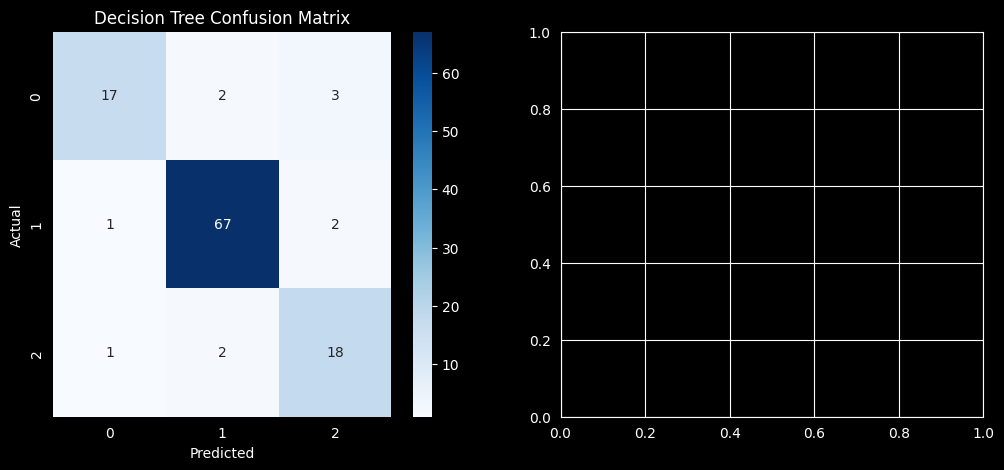

In [425]:
# Predictions of Decision Tree
dt_preds = dt_model.predict(X_test)

# Accuracy of Decision Tree
dt_accuracy = accuracy_score(y_test, dt_preds)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Classification Report of Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_preds))

# Confusion Matrix of Decision Tree
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
plt.show()


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;"> Random Forest Base Model</span></b>
</h2>


In [426]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [427]:
#Predictions of Random Forest
rf_preds = rf_model.predict(X_test)

# Accuracy of Random Forest
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Classification Report of Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# Confusion Matrix of Random Forest
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.show()

Random Forest Accuracy: 0.9115

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.97      0.93      0.95        70
           2       0.77      0.95      0.85        21

    accuracy                           0.91       113
   macro avg       0.88      0.90      0.89       113
weighted avg       0.92      0.91      0.91       113



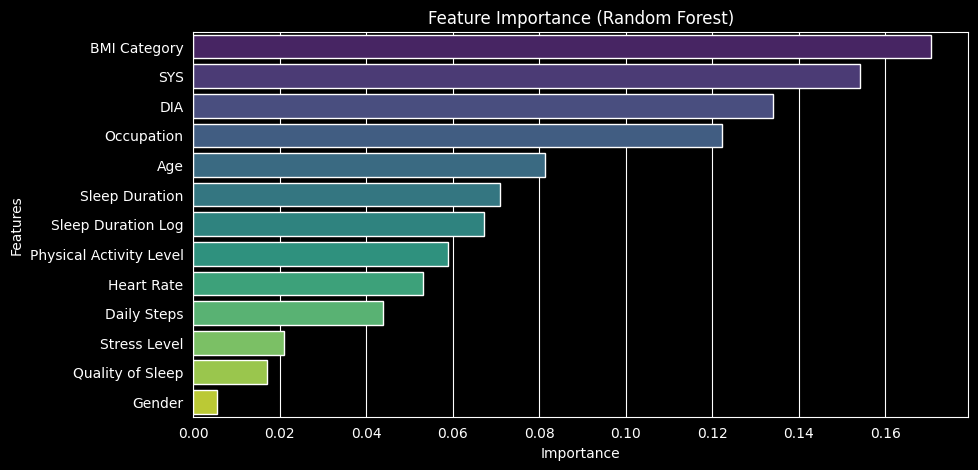

In [428]:
# Get feature importance from Random Forest
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Support Vector Machine</span></b>
</h2>


In [429]:
# Train Support Vector Machine
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [430]:
# Predictions of SVC Model
pred = svc_model.predict(X_test)

# Accuracy of SVC Model
accuracy = accuracy_score(y_test, pred)

print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix of SVC Model
print(confusion_matrix(y_test, pred))

# Classification Report of SVC Model
print(classification_report(y_test, pred))

Accuracy: 0.7522
[[ 2 18  2]
 [ 0 68  2]
 [ 1  5 15]]
              precision    recall  f1-score   support

           0       0.67      0.09      0.16        22
           1       0.75      0.97      0.84        70
           2       0.79      0.71      0.75        21

    accuracy                           0.75       113
   macro avg       0.73      0.59      0.58       113
weighted avg       0.74      0.75      0.69       113



In [431]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [432]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.642 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.596 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.654 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.577 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.615 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.868 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.808 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.865 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.887 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [433]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [434]:
grid_prediction = grid.predict(X_test)

In [450]:
print("\nSVM Classification Report:\n")
print(classification_report(y_test, grid_prediction))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, grid_prediction))


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.97      0.94      0.96        70
           2       0.87      0.95      0.91        21

    accuracy                           0.93       113
   macro avg       0.90      0.92      0.91       113
weighted avg       0.93      0.93      0.93       113

Confusion Matrix:

[[19  2  1]
 [ 2 66  2]
 [ 1  0 20]]


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">Logistic Regresion Model</span></b>
</h2>


In [437]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.97      0.94      0.96        70
           2       0.79      0.90      0.84        21

    accuracy                           0.90       113
   macro avg       0.86      0.87      0.86       113
weighted avg       0.91      0.90      0.90       113

Confusion Matrix:
 [[17  2  3]
 [ 2 66  2]
 [ 2  0 19]]


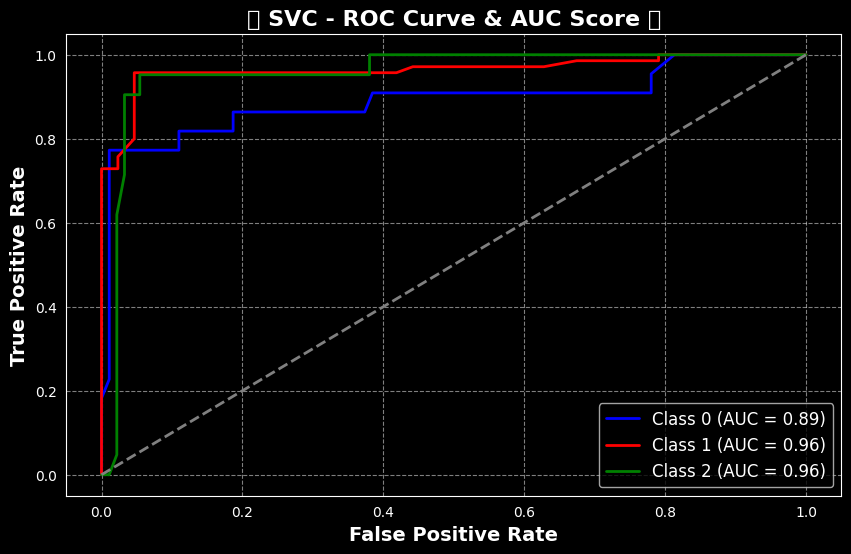

In [438]:

# Binarize the output if there are multiple classes
n_classes = len(set(y_test))  # Number of unique classes
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = lr_model.decision_function(X_test)  # Get prediction probabilities

# Plot the ROC curve for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange']  # Define colors for different classes

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)

# Formatting the UI
plt.xlabel("False Positive Rate", fontsize=14, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=14, fontweight="bold")
plt.title("🔥 SVC - ROC Curve & AUC Score 🔥", fontsize=16, fontweight="bold")
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


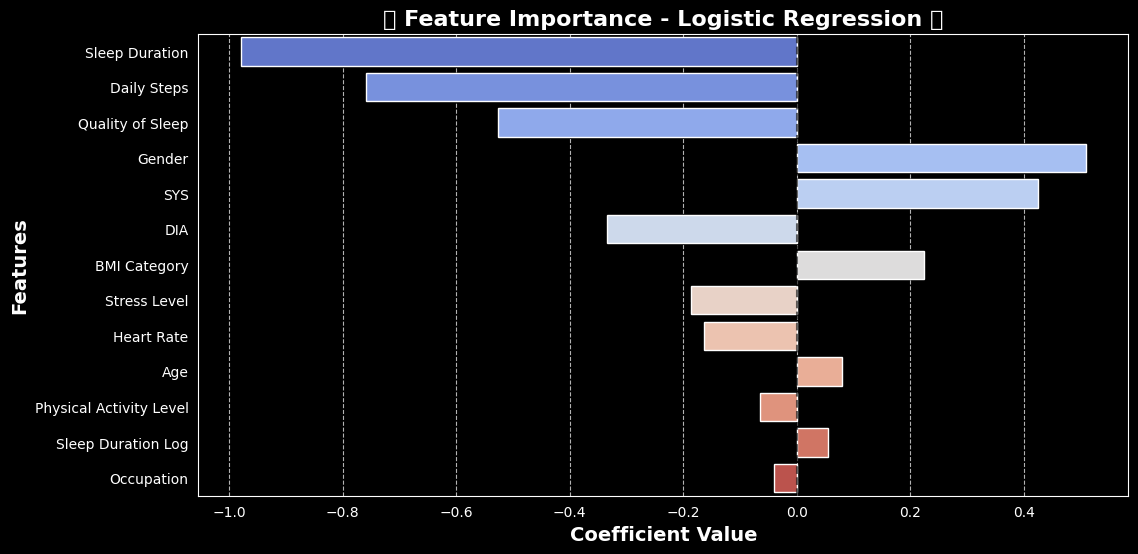

In [439]:
# Extract feature importance (coefficients)
coefficients = lr_model.coef_[0]  # model is your trained logistic regression model
features = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df["Absolute_Coefficient"] = np.abs(importance_df["Coefficient"])  # Take absolute values
importance_df = importance_df.sort_values(by="Absolute_Coefficient", ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df["Coefficient"], y=importance_df["Feature"], palette="coolwarm")

# Enhancing UI
plt.axvline(x=0, color='black', linestyle='--', alpha=0.6)
plt.xlabel("Coefficient Value", fontsize=14, fontweight="bold")
plt.ylabel("Features", fontsize=14, fontweight="bold")
plt.title("📊 Feature Importance - Logistic Regression 📊", fontsize=16, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">KNN Model</span></b>
</h2>


In [440]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.96      0.96      0.96        70
           2       0.79      0.90      0.84        21

    accuracy                           0.91       113
   macro avg       0.88      0.88      0.88       113
weighted avg       0.91      0.91      0.91       113

Confusion Matrix:
 [[17  2  3]
 [ 1 67  2]
 [ 1  1 19]]


In [441]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform Grid Search for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [442]:

# Best parameters and score for KNN
print("Best Parameters (KNN):", grid_search_knn.best_params_)
print("Best Accuracy (KNN):", grid_search_knn.best_score_)

# Train the best KNN model
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Classification Report for KNN
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))

Best Parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Accuracy (KNN): 0.8849002849002849
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.94      0.96      0.95        70
           2       0.80      0.95      0.87        21

    accuracy                           0.91       113
   macro avg       0.89      0.88      0.88       113
weighted avg       0.92      0.91      0.91       113

Confusion Matrix (KNN):
 [[16  3  3]
 [ 1 67  2]
 [ 0  1 20]]


<a id="missing"></a>
<h2 style="font-size: 1.8em; text-align: left; font-family: Arial, sans-serif; color: white; background-color: #2c3e50; padding: 15px; border-radius: 10px;">
    <b><span style="color:#e74c3c;">|</span><span style="color:#ecf0f1;">XGBoost Model</span></b>
</h2>


In [443]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.97      0.96      0.96        70
           2       0.80      0.95      0.87        21

    accuracy                           0.92       113
   macro avg       0.89      0.89      0.89       113
weighted avg       0.92      0.92      0.92       113

Confusion Matrix:
 [[17  2  3]
 [ 1 67  2]
 [ 1  0 20]]


<!-- Model Evaluation -->
<h2 id="evaluation" style="color: #3498DB; text-decoration: underline;">📊 Model Evaluation</h2>
<p style="font-size: 1.1em;">Assessing model accuracy using performance metrics.</p>

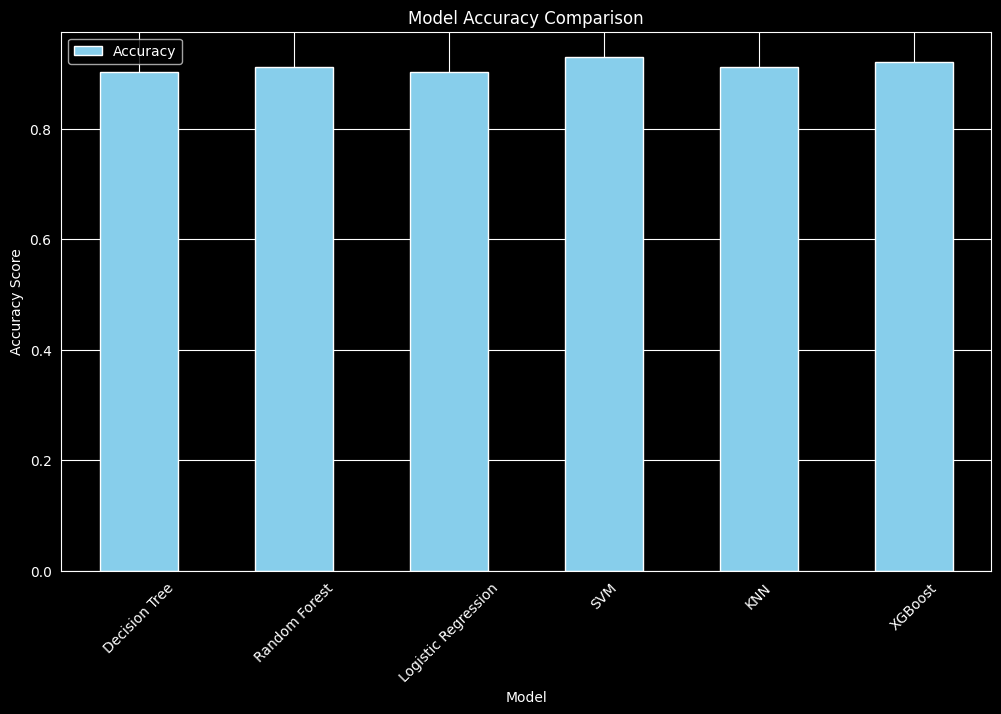

In [444]:
# Store results in a dictionary
results = {
    "Decision Tree": classification_report(y_test, dt_preds, output_dict=True)['accuracy'],
    "Random Forest": classification_report(y_test, rf_preds, output_dict=True)['accuracy'],
    "Logistic Regression": classification_report(y_test, y_pred_lr, output_dict=True)['accuracy'],
    "SVM": classification_report(y_test, grid_prediction, output_dict=True)['accuracy'],
    "KNN": classification_report(y_test, y_pred_knn, output_dict=True)['accuracy'],
    "XGBoost": classification_report(y_test, y_pred_xgb, output_dict=True)['accuracy']
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy"])

# Plot the results
results_df.plot(kind='bar', figsize=(12, 7), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.show()


In [445]:
# Assuming 'results' dictionary from the provided code is available
results = {
    "Decision Tree": classification_report(y_test, dt_preds, output_dict=True)['accuracy'],
    "Random Forest": classification_report(y_test, rf_preds, output_dict=True)['accuracy'],
    "Logistic Regression": classification_report(y_test, y_pred_lr, output_dict=True)['accuracy'],
    "SVM": classification_report(y_test, grid_prediction, output_dict=True)['accuracy'],
    "KNN": classification_report(y_test, y_pred_knn, output_dict=True)['accuracy'],
    "XGBoost": classification_report(y_test, y_pred_xgb, output_dict=True)['accuracy']
}

# Convert to DataFrame and sort
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=True)

# Print the sorted results
results_df


,Accuracy
Decision Tree,0.902655
Logistic Regression,0.902655
Random Forest,0.911504
KNN,0.911504
XGBoost,0.920354
SVM,0.929204


In [446]:
# 🔹 Save the Processed Data
processed_file_path = "processed_sleep_disorders.csv"
df.to_csv(processed_file_path, index=False)

print(f"Processed dataset saved as: {processed_file_path}")

Processed dataset saved as: processed_sleep_disorders.csv
